In [1]:
import tensorflow


In [2]:
# Import useful packages

In [3]:
import nltk
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
import matplotlib.pyplot as plt
%matplotlib inline
ps = nltk.PorterStemmer()           
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from pprint import pprint

from string import punctuation

nltk.download('punkt')



# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis

import pyLDAvis.gensim 
import pyLDAvis.sklearn  
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
pyLDAvis.enable_notebook()

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegressionCV

import pickle
import os

os.environ['KERAS_BACKEND']='tensorflow' 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint

import chakin

[nltk_data] Downloading package punkt to /Users/selma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Using TensorFlow backend.


In [4]:
tweets=pd.read_csv('Global_warming.csv', sep='\t')

In [5]:
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,Tweet Created At,Tweet Text,User Location,User Name
0,0,0,False,1186852600404160512,Twitter Web App,NaN,164,False,eugene_byers,NaN,2019-10-23 03:51:25,RT @climatecosts: Exxon knew for more than 50 ...,"Hillside, NJ",Eugene Byers
1,1,0,False,1186852499921104897,Twitter for iPhone,NaN,1829,False,sweetgin4E,NaN,2019-10-23 03:51:01,RT @1776Stonewall: I told you about the Canadi...,👎dms 👎porn,Virginia
2,2,0,False,1186852484200820736,Twitter for Android,NaN,1829,False,americanqueen84,NaN,2019-10-23 03:50:57,RT @1776Stonewall: I told you about the Canadi...,"California, USA",Liz Sensanbaugher🇺🇸
3,3,0,False,1186852478203002881,Twitter for iPad,1.186850e+18,0,False,aguy18310792,NaN,2019-10-23 03:50:56,@Misfit603 @TexasRickPowell @CNN Global warmin...,PNW,aguy
4,4,0,False,1186852446812831744,Twitter Web App,NaN,2877,False,Protectionist10,NaN,2019-10-23 03:50:48,"RT @SayWhenLA: You circle jerk over Tulsi, yet...",Hawaii,🇺🇸Protectionist🇺🇸


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Unnamed: 0           10000 non-null int64
Favorite Count       10000 non-null int64
Favorited            10000 non-null bool
ID                   10000 non-null int64
Phone Type           10000 non-null object
Replied              1194 non-null float64
Retweet Count        10000 non-null int64
Retweeted            10000 non-null bool
Screen Name          10000 non-null object
Tweet Coordinates    0 non-null float64
Tweet Created At     10000 non-null object
Tweet Text           10000 non-null object
User Location        6627 non-null object
User Name            10000 non-null object
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 957.1+ KB


In [7]:
tweets.describe()

,Unnamed: 0,Favorite Count,ID,Replied,Retweet Count,Tweet Coordinates
count,10000.00000,10000.000000,1.000000e+04,1.194000e+03,10000.000000,0.0
mean,4999.50000,1.132900,1.186721e+18,1.185385e+18,1092.808800,NaN
std,2886.89568,35.218777,7.941845e+13,1.539351e+16,6836.944605,NaN
min,0.00000,0.000000,1.186569e+18,8.262831e+17,0.000000,NaN
25%,2499.75000,0.000000,1.186650e+18,1.186583e+18,1.000000,NaN
50%,4999.50000,0.000000,1.186733e+18,1.186669e+18,70.000000,NaN
75%,7499.25000,0.000000,1.186786e+18,1.186743e+18,1829.000000,NaN
max,9999.00000,3279.000000,1.186853e+18,1.186852e+18,148912.000000,NaN


# Feature engeneering 

In [8]:
tweets['Tweet Text']=tweets['Tweet Text'].apply(lambda x: str(x))

In [9]:
# Number of words
tweets ['word_count']= tweets['Tweet Text'].apply(lambda x: len(str(x).split(" ")))
# Number of Characters 
tweets['char_count'] = tweets['Tweet Text'].str.len()
# average word length
def avg_word(sentence):
    try:
        words = sentence.split()
        return (sum(len(word) for word in words)/len(words))
    except AttributeError:
        pass
        

tweets['avg_word'] = tweets['Tweet Text'].apply(lambda x: avg_word(x))
# Count Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')


tweets['stopwords_counts'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweets['hastags'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweets['tags'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tweets['numerics'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))





# Clean tweet text to use in Machine learning

In [10]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stop]
    text= [word for word in text  if not word.startswith('#')]
    text=[word for word in text if not word.startswith ('@')]
    text=[word for word in text if word!='rt']
    text=[re.sub(r"http\S+", "", word) for word in text]
    return text

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-10-9cca8244e1eb>:3: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text)


In [11]:
tweets['Clean_tweet_text']= tweets['Tweet Text'].apply(clean_text)

In [12]:
tweets['Clean_tweet_text'].head()

0    [climatecosts, exxon, knew, 50, years, product...
1    [1776stonewall, told, canadian, professor, fir...
2    [1776stonewall, told, canadian, professor, fir...
3    [misfit603, texasrickpowell, cnn, global, warm...
4    [saywhenla, circle, jerk, tulsi, yet, ubi, med...
Name: Clean_tweet_text, dtype: object

# Sentiment analysis

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [14]:
tweets['Polarity_score']=tweets['Tweet Text'].apply(sentiment_analyzer_scores)
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,...,User Name,word_count,char_count,avg_word,stopwords_counts,hastags,tags,numerics,Clean_tweet_text,Polarity_score
0,0,0,False,1186852600404160512,Twitter Web App,NaN,164,False,eugene_byers,NaN,...,Eugene Byers,23,140,5.130435,9,0,1,1,"[climatecosts, exxon, knew, 50, years, product...",-0.2023
1,1,0,False,1186852499921104897,Twitter for iPhone,NaN,1829,False,sweetgin4E,NaN,...,Virginia,24,139,4.833333,10,0,1,0,"[1776stonewall, told, canadian, professor, fir...",-0.5574
2,2,0,False,1186852484200820736,Twitter for Android,NaN,1829,False,americanqueen84,NaN,...,Liz Sensanbaugher🇺🇸,24,139,4.833333,10,0,1,0,"[1776stonewall, told, canadian, professor, fir...",-0.5574
3,3,0,False,1186852478203002881,Twitter for iPad,1.186850e+18,0,False,aguy18310792,NaN,...,aguy,8,67,7.500000,1,0,3,0,"[misfit603, texasrickpowell, cnn, global, warm...",0.1531
4,4,0,False,1186852446812831744,Twitter Web App,NaN,2877,False,Protectionist10,NaN,...,🇺🇸Protectionist🇺🇸,25,140,4.640000,5,0,1,0,"[saywhenla, circle, jerk, tulsi, yet, ubi, med...",-0.9100


In [15]:
def Sentiment(score):
    if score>0:
        return 'Positive'
    if score<0:
        return 'Negative'
    return 'Neutral'

In [16]:
tweets['Sentiment']=tweets['Polarity_score'].apply(Sentiment)
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,...,word_count,char_count,avg_word,stopwords_counts,hastags,tags,numerics,Clean_tweet_text,Polarity_score,Sentiment
0,0,0,False,1186852600404160512,Twitter Web App,NaN,164,False,eugene_byers,NaN,...,23,140,5.130435,9,0,1,1,"[climatecosts, exxon, knew, 50, years, product...",-0.2023,Negative
1,1,0,False,1186852499921104897,Twitter for iPhone,NaN,1829,False,sweetgin4E,NaN,...,24,139,4.833333,10,0,1,0,"[1776stonewall, told, canadian, professor, fir...",-0.5574,Negative
2,2,0,False,1186852484200820736,Twitter for Android,NaN,1829,False,americanqueen84,NaN,...,24,139,4.833333,10,0,1,0,"[1776stonewall, told, canadian, professor, fir...",-0.5574,Negative
3,3,0,False,1186852478203002881,Twitter for iPad,1.186850e+18,0,False,aguy18310792,NaN,...,8,67,7.500000,1,0,3,0,"[misfit603, texasrickpowell, cnn, global, warm...",0.1531,Positive
4,4,0,False,1186852446812831744,Twitter Web App,NaN,2877,False,Protectionist10,NaN,...,25,140,4.640000,5,0,1,0,"[saywhenla, circle, jerk, tulsi, yet, ubi, med...",-0.9100,Negative


In [17]:
sample_sentiment=tweets.sample(300)

In [18]:
sample_sentiment.to_excel('sample_sentiment.xls')#, sep='\t', encoding='utf-8', header=False)

# TFIDF Vectorizer

In [14]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets['Tweet Text'])

# LDA 

In [15]:
components=6
random_state=0

In [16]:
LDA=LatentDirichletAllocation(n_components=components, random_state=random_state)

In [17]:
LDA.fit(X_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

# get the most comon words for each topic

In [23]:
for index, topic in enumerate( LDA.components_):
    print ('Top 20 words for topic{}'.format(index))
    for i in topic.argsort()[-20:]:
        print (tfidf_vect.get_feature_names()[i])
    print('********************************') 

Top 20 words for topic0
60
known
dangers

breitbartnews
news
awful
gang
another
hoax
hoaxes
long
line
liberal
truth
dbongino
existential
threat
global
warming
********************************
Top 20 words for topic1
speech
democrats
state
natural
trump
may
products
warning
instead
sp
50
climatecosts
knew
causing
years
public
exxon
warming
global

********************************
Top 20 words for topic2
top
via
telling
psychometalhed
heretical
ny
sin
warming
global

arctic
told
canadian
1776stonewall
thriving
fired
professor
proved
polar
bears
********************************
Top 20 words for topic3
vibrant
barrier
future
great
says
warming
global
reef

fuel
fossil
heat
compani
nytclimate
mess
homes
nytopinion
cars
drive
climate
********************************
Top 20 words for topic4
90
average
like
would
weather
100
world
happening
shit
percent
real
could
still
cold
talk
fast
people

warming
global
********************************
Top 20 words for topic5
report
real
co2
climate
know
m

# create a topic label column in the original dataframe

In [18]:
topic_results=LDA.transform(X_tfidf)

In [19]:
topic_results.shape

(10000, 6)

In [20]:
tweets['topic']=topic_results.argmax(axis=1)

tweets.head()

# Visualisations

Text(0.5, 1.0, 'topic distribution')

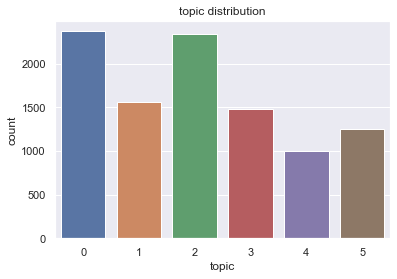

In [27]:
ax = sns.countplot(x="topic", data=tweets)
ax.set_title('topic distribution')

Text(0.5, 1.0, 'topic distribution')

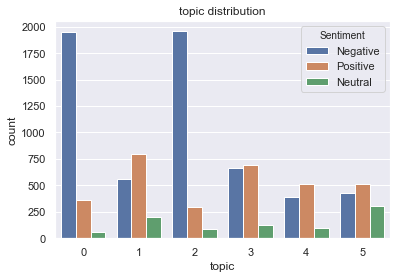

In [24]:
ax = sns.countplot(x="topic",hue='Sentiment', data=tweets)
ax.set_title('topic distribution')

In [36]:
panel = pyLDAvis.sklearn.prepare(LDA, X_tfidf, tfidf_vect, mds='tsne')# see if I can adjust the visualisation to the combines topics
panel

//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -11.721328 -40.083977       1        1  21.990837
0     -48.441170  19.511503       2        1  21.293213
1      10.931973  14.984368       3        1  16.097929
3      61.626476  46.222164       4        1  15.649612
5      -3.111373  72.850372       5        1  13.686361
4      56.305714 -23.576836       6        1  11.282048, topic_info=     Category        Freq            Term       Total  loglift  logprob
985   Default  427.000000           bears  427.000000  30.0000  30.0000
6495  Default  427.000000           polar  427.000000  29.0000  29.0000
6733  Default  426.000000          proved  426.000000  28.0000  28.0000
6669  Default  426.000000       professor  426.000000  27.0000  27.0000
3278  Default  423.000000           fired  423.000000  26.0000  26.0000
8502  Default  421.000000        thriving  421.000000  25.0000  25.0000
53    Default  421.000000   1776stonewall  421.000000  24.0000  24.0000
1427  Default  421.000000        canadian  421.000000  23.0000  23.0000
8559  Default  420.000000            told  420.000000  22.0000  22.0000
727   Default  421.000000          arctic  421.000000  21.0000  21.0000
3044  Default  229.000000     existential  229.000000  20.0000  20.0000
2296  Default  228.000000        dbongino  228.000000  19.0000  19.0000
5010  Default  228.000000         liberal  228.000000  18.0000  18.0000
5054  Default  228.000000            line  228.000000  17.0000  17.0000
4051  Default  228.000000          hoaxes  228.000000  16.0000  16.0000
8495  Default  230.000000          threat  230.000000  15.0000  15.0000
5115  Default  229.000000            long  229.000000  14.0000  14.0000
8699  Default  234.000000           truth  234.000000  13.0000  13.0000
3527  Default  216.000000            gang  216.000000  12.0000  12.0000
870   Default  216.000000           awful  216.000000  11.0000  11.0000
1271  Default  208.000000   breitbartnews  208.000000  10.0000  10.0000
4049  Default  237.000000            hoax  237.000000   9.0000   9.0000
5849  Default  221.000000            news  221.000000   8.0000   8.0000
652   Default  235.000000         another  235.000000   7.0000   7.0000
9063  Default  581.000000         warming  581.000000   6.0000   6.0000
3651  Default  582.000000          global  582.000000   5.0000   5.0000
2642  Default   98.000000           drive   98.000000   4.0000   4.0000
1491  Default   98.000000            cars   98.000000   3.0000   3.0000
5992  Default   97.000000      nytopinion   97.000000   2.0000   2.0000
4079  Default   97.000000           homes   97.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
3872   Topic6    5.620269            halt    6.262478   2.0738  -6.4556
2038   Topic6    5.465952          corals    6.108161   2.0709  -6.4834
1547   Topic6    5.217427  cclimateaction    5.859636   2.0659  -6.5300
6311   Topic6   11.003496         percent   12.363907   2.0654  -5.7838
5756   Topic6    4.862304    nairashalaby    5.504513   2.0579  -6.6005
9263   Topic6    7.837755            wont    8.910291   2.0537  -6.1230
3392   Topic6    4.555737      fossilfuel    5.200970   2.0495  -6.6656
853    Topic6    9.168980         average   10.629322   2.0342  -5.9662
4233   Topic6    7.941062         ignored    9.251125   2.0293  -6.1099
3886   Topic6   10.612528       happening   13.003918   1.9787  -5.8199
3173   Topic6   14.621984            fast   18.650822   1.9386  -5.4995
259    Topic6    9.069455              90   11.092549   1.9806  -5.9771
8746   Topic6    7.804076           twice    9.270582   2.0098  -6.1273
8016   Topic6   12.824513           still   18.789122   1.8000  -5.6306
3115   Topic6    9.019408            fact   11.839588   1.9099  -5.9826
6306   Topic6   17.767712          people   36.990463   1.4487  -5.3046
2065   Topic6   12.344216           could   21.150421

In [26]:
# topics are very distinct so we can move forward with understanding what are the topics about

# Understand topics

In [27]:
sample_df=tweets.groupby('topic')['Tweet Text'].apply(lambda s: s.sample(25))

In [28]:
pd.DataFrame(sample_df)

Tweet Text
topic                                                        
0     1204  RT @BreitbartNews: Awful news for the Global W...
      989   RT @ccdeditor: Why The Global Warming Movement...
      4258  RT @BreitbartNews: Awful news for the Global W...
      4255  RT @BreitbartNews: Awful news for the Global W...
      7733  RT @dbongino: Global warming is an existential...
      1622  RT @BreitbartNews: Awful news for the Global W...
      7831  RT @dbongino: Global warming is an existential...
      5970  RT @mzjacobson: “For 60 years, the fossil fuel...
      6617  RT @gilmcgowan: Harvard report: “For 60 years,...
      4029  RT @BreitbartNews: Awful news for the Global W...
      6110  RT @mzjacobson: “For 60 years, the fossil fuel...
      7032  RT @dbongino: Global warming is an existential...
      9704                    @zenzele Global warming is real
      4143  RT @BreitbartNews: Awful news for the Global W...
      8733  RT @dbongino: Global warming is an existential...
      3655  RT @BreitbartNews: Awful news for the Global W...
      7355  Let me guess....he'll apologize for that dick ...
      9157  RT @dbongino: Global warming is an existential...
      4043  RT @BreitbartNews: Awful news for the Global W...
      762   @campusmoviefest are we experiencing global wa...
      4875  RT @dbongino: Global warming is an existential...
      4224  RT @BreitbartNews: Awful news for the Global W...
      7124  RT @dbongino: Global warming is an existential...
      8205  @dbongino Only global warming I see and believ...
      8482  RT @mzjacobson: “For 60 years, the fossil fuel...
1     5513  RT @JenitaM: Getting schooled at #SustainableB...
      8138  RT @LarrySchweikart: Stuart Varney: Trump spee...
      8410  RT @BLaw: New York’s AG will square off agains...
      9913  RT @WesDunn9: Will be Interesting to see if th...
      205   https://t.co/Og0Ktq4gQR: Why a Growing Greenla...
...                                                       ...
4     4449  RT @HumanProgress: Amid all the talk of an imm...
      2208  Oh no :( my coworker doesn’t believe in global...
      5113      @OHKAYCHRIS Global warming is very spooky lol
      5765  @clequere @royalsociety @tomheapmedia So you'r...
      8587  'Use terms like ‘global warming’ and people he...
5     9497  @californiapatr2 Co2 is actually 95% water vap...
      9473  RT @MickGreenhough: @the_tpa @Tee_Ess1612 @XRe...
      6488  RT @katiikiri: @KintuLinda @makthegrek @Kaguta...
      6102  I am dying and global warming is real. That is...
      6990  RT @TheAliceSmith: Global warming activists ar...
      6764  RT @sarahvetwales: This is a game-changer: new...
      1419  RT @EVILJOHNSAVAGE: ORIGINS OF THE GLOBAL WARM...
      7614  Dear In-n-Out Burger, please open a store in A...
      3772  RT @Commoner1: @dbirch214 The debate and vote ...
      3561  RT @sarahvetwales: This is a game-changer: new...
      9879  RT @Lcars24: The facts are there that we have ...
      6893  @FTP_Tigerlily @Jordan_Sather_ I know all abou...
      9448  @bacardinen @manifesto2000 @FredFoxyGuy @EDavi...
      6275  @SindhuSorath @BeingShamss U told that u r nat...
      5370  RT @ADevotedYogi: @priscian @Article3S @caerba...
      2037  RT @EVILJOHNSAVAGE: ORIGINS OF THE GLOBAL WARM...
      757   RT @JaggerMickOZ: CO2 can absorb IR but can’t ...
      6117  Global warming here in Nisku. Help https://t.c...
      9808  #ClimateChange and global warming. #Belarus is...
      8335  RT @sarahvetwales: This is a game-changer: new...
      1709  RT @sarahvetwales: This is a game-changer: new...
      2033  RT @EVILJOHNSAVAGE: ORIGINS OF THE GLOBAL WARM...
      5427  RT @70sBachchan: Live action shot of next G-7 ...
      8664  I think the global warming activist would get ...
      6082  RT @HighlandWPark: #DYK polar bears are under ...

[150 rows x 1 columns]

In [29]:
sample_df.to_csv('Global warming_sample_tweets.csv', sep='\t', encoding='utf-8', header=False)

after reading a sample from each topic:
0- Opinions
1- international politics
2,3- informative topics to be combined
4,5-call for action


##### combining classes 2, 3 and 4,5

In [21]:
def adjust_classes(n):
    if n==3:
        return 2
    if n in [4,5]:
        return 3
    return n

In [22]:
tweets['topic']=tweets['topic'].apply(adjust_classes)

In [30]:
tweets['topic'].value_counts()

2    3815
0    2371
3    2251
1    1563
Name: topic, dtype: int64

In [1]:
tweets.to_excel('tweets_with_label.xls')#, sep='\t', encoding='utf-8', header=False)

NameError: name 'tweets' is not defined

# SVM Classification pipeline

In [33]:
X=pd.concat([pd.DataFrame(X_tfidf.toarray()), tweets[['word_count', 'char_count', 'avg_word', 'stopwords_counts',
       'hastags', 'tags', 'numerics']]], axis=1)
X.shape

(10000, 9447)

In [34]:
Y=tweets['topic']

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X , Y, test_size=0.2)


In [72]:
svm_clf=Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge'))
])

In [73]:
svm_clf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [74]:
y_pred=svm_clf.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[441   8   8  16]
 [  6 284   8  26]
 [  7  22 672  48]
 [ 10  40  25 379]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       473
           1       0.80      0.88      0.84       324
           2       0.94      0.90      0.92       749
           3       0.81      0.83      0.82       454

    accuracy                           0.89      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.89      0.89      0.89      2000



In [76]:
# pickle the model

filename = 'linear_svm_clf.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

In [77]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.888


# Logistic regression CV

In [43]:
logisctic_CV=Pipeline([
    ('scaler', StandardScaler()),
    ('Logistic_CV', LogisticRegressionCV(cv=5, random_state=0,
                           multi_class='multinomial'))
    
])

In [44]:
logisctic_CV.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Logistic_CV',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='multinomial',
                                      n_jobs=None, penalty='l2', random_state=0,
                                      refit=True, scoring=None, solver='lbfgs',
                                      tol=0.0001, verbose=0))],
         verbose=False)

In [45]:
y_pred=clf.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[425   0  22  36]
 [  4 195  45  82]
 [  2   8 654  82]
 [  3  12  54 376]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       483
           1       0.91      0.60      0.72       326
           2       0.84      0.88      0.86       746
           3       0.65      0.84      0.74       445

    accuracy                           0.82      2000
   macro avg       0.85      0.80      0.81      2000
weighted avg       0.84      0.82      0.83      2000



In [49]:
filename = 'logistic_regression_CV.sav'
pickle.dump(logisctic_CV, open(filename, 'wb'))

# Word embedding

In [23]:

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 100000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
TEST_SPLIT=0.2

In [24]:

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(tweets['Tweet Text'])
sequences = tokenizer.texts_to_sequences(tweets['Tweet Text'])

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 12435


In [25]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(tweets['topic']))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_test_samples = int(TEST_SPLIT * data.shape[0])
nb_val_samples = int (VALIDATION_SPLIT*nb_test_samples)

x_train = data[:-(nb_val_samples+nb_test_samples)]
y_train = labels[:-(nb_val_samples+nb_test_samples)]
x_val = data[-(nb_val_samples+nb_test_samples):-nb_test_samples:]
y_val = labels[-(nb_val_samples+nb_test_samples):-nb_test_samples:]
x_test = data[-nb_test_samples:]
y_test = labels[-nb_test_samples:]

Shape of Data Tensor: (10000, 1000)
Shape of Label Tensor: (10000, 4)


In [37]:
from zipfile import ZipFile
with ZipFile('glove6b100dtxt.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [27]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [28]:

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

# CNN

In [120]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(4, activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Simplified convolutional neural network")
model.summary()
cp=ModelCheckpoint('model_cnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Simplified convolutional neural network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         1243600   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 

In [121]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=2,callbacks=[cp])

W1029 21:35:42.075151 4713080256 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7600 samples, validate on 400 samples
Epoch 1/15
7600/7600 [==============================] - 114s 15ms/step - loss: 0.6325 - acc: 0.7393 - val_loss: 0.6626 - val_acc: 0.7900

Epoch 00001: val_acc improved from -inf to 0.79000, saving model to model_cnn.hdf5
Epoch 2/15
7600/7600 [==============================] - 112s 15ms/step - loss: 0.5257 - acc: 0.7980 - val_loss: 0.4591 - val_acc: 0.7750

Epoch 00002: val_acc did not improve from 0.79000
Epoch 3/15
7600/7600 [==============================] - 110s 14ms/step - loss: 0.5499 - acc: 0.8151 - val_loss: 0.5870 - val_acc: 0.7875

Epoch 00003: val_acc did not improve from 0.79000
Epoch 4/15
7600/7600 [==============================] - 105s 14ms/step - loss: 0.5386 - acc: 0.8329 - val_loss: 0.6013 - val_acc: 0.7800

Epoch 00004: val_acc did not improve from 0.79000
Epoch 5/15
7600/7600 [==============================] - 114s 15ms/step - loss: 0.5208 - acc: 0.8459 - val_loss: 0.6211 - val_acc: 0.7875

Epoch 00005: val_acc did not i

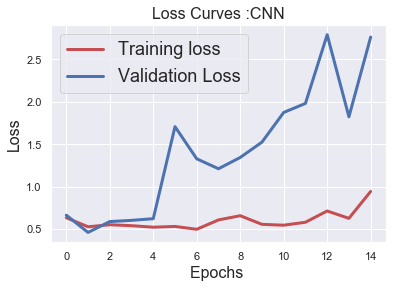

In [122]:

fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

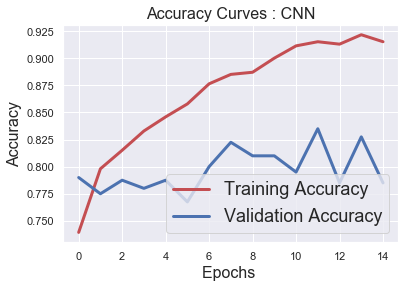

In [123]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

after 2 epochs, the training accuracy continues to increase wereas the va

# RNN

In [29]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(4, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

W1101 18:16:58.792801 4590462400 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1101 18:16:58.802072 4590462400 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1101 18:16:58.802752 4590462400 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1101 18:16:59.238256 4590462400 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         1243600   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 804       
Total params: 1,405,204
Trainable params: 1,405,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=5, batch_size=2,callbacks=[cp])

Train on 7600 samples, validate on 400 samples
Epoch 1/5
6242/7600 [=======================>......] - ETA: 16:23 - loss: 0.5934 - acc: 0.7437

In [ ]:

fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

In [ ]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()